# Project notebook **


### Students: Dana & Katherine


### Data name : House Prices
### Data URL : https://www.kaggle.com/c/house-prices-advanced-regression-techniques
### Short summary of the project and datasource :
Predicting house prices based on the dataset collected in Iowa, USA. In this project, we aim to build linear regression model for the prediction. In order to achieve this, we will need to do perform preprocessing (missing values, type errors) and also analyse which features out of the 79 provided will create the best prediction.

### Aims : 

The main aim for this project is to predict house price based on the given dataset using linear regression. The following steps will be done in order to do the analysis and prediction.

* Preprocessing: Deal with missing values, correct the data types, remove outliers
* Feature selection: Preanalysis with PCA, perform feature elemination, analyse variable correlations
* Prediction: Perform prediction based on several models (linear regression, random forest)
* Evaluate results

In [1]:
# Import required libraries and set some configurations
from IPython.display import display
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import linear_model
from scipy import stats
import matplotlib.pyplot as pyplot
import statsmodels.formula.api as smf
import seaborn as sb
import numpy as np
import re
import pandas

%matplotlib inline

pandas.set_option('display.max_columns', None) 
pandas.set_option('display.max_rows', None) 

# Download : 

* Download file from Dropbox (as Kaggle does not fully support direct downloads)
* Set Id column as the index of the data frame
* Analyse the variables names and data types to see if any needs to be corrected

In [2]:
url = "https://www.dropbox.com/s/26rk4u0ywqt56pn/house_price.csv?dl=1"
data = pandas.read_csv(url, index_col = "Id")
print("Data shape: ", data.shape)
display(data.dtypes)

Data shape:  (1460, 80)


MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object


By comparing the data types above with the description of the data set, we identified that "MSSubClass" and "MoSold" should be treated as categorical variables. MSSubClass represents the type of dwelling involved in the sale, and MoSold represents the month when the property was sold. Hence, although the values are numerical, they may not necessarily have linear relationship with SalePrice.

Furthermore, some of the variable names start with a number and this does not follow Python's naming convention. To avoid problems with this in future analysis, we will rename the variables.

Rating variables (e.g. OverallQual) which go from 1-10 in discrete manner will remain as quantitative variables for now. This is because we assume that the rating will have linear relationship with the SalePrice.

Lastly, for the variables of type 'object', we will set them as pandas categorical object. This is done so that we can benefit pandas' categorical functions and also to easily separate them from the continuous variables.

In [3]:
wrong_columns = ["MSSubClass", "MoSold"]
for col in wrong_columns:
    data[col] = data[col].astype('category')

for col in data:
    if(data[col].dtype.name == 'object'):
        data[col] = data[col].astype('category')

data.rename(columns={'1stFlrSF': 'FirstFlrSF',
                     '2ndFlrSF': 'SecondFlrSF',
                     '3SsnPorch': 'ThreeSsnPorch'}, inplace=True)
        
display(data.dtypes)

MSSubClass       category
MSZoning         category
LotFrontage       float64
LotArea             int64
Street           category
Alley            category
LotShape         category
LandContour      category
Utilities        category
LotConfig        category
LandSlope        category
Neighborhood     category
Condition1       category
Condition2       category
BldgType         category
HouseStyle       category
OverallQual         int64
OverallCond         int64
YearBuilt           int64
YearRemodAdd        int64
RoofStyle        category
RoofMatl         category
Exterior1st      category
Exterior2nd      category
MasVnrType       category
MasVnrArea        float64
ExterQual        category
ExterCond        category
Foundation       category
BsmtQual         category
BsmtCond         category
BsmtExposure     category
BsmtFinType1     category
BsmtFinSF1          int64
BsmtFinType2     category
BsmtFinSF2          int64
BsmtUnfSF           int64
TotalBsmtSF         int64
Heating     

# Data charaterisctics
* The dataset contains 1460 records and 80 variables.
* 35 of the variables are quantitative and 45 are categorical.
* From observing the count of each variable, it can be seen that there are some missing values in the dataset.
* The dataset may also have some outliers from observing the describe() output.
* Log of SalePrice somewhat follows normal distribution, hence linear regression will be applicable.

In [4]:
print("Total quantitative variables: ", len(data.select_dtypes(exclude={'category'}).columns))
print("Total categorical variables: ", len(data.select_dtypes(include={'category'}).columns))

display(data.select_dtypes(exclude={'category'}).describe())
display(data.select_dtypes(include={'category'}).describe())

display(data[:5])

Total quantitative variables:  35
Total categorical variables:  45


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,FirstFlrSF,SecondFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ThreeSsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
count,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,2007.815753,180921.195890
std,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,1.328095,79442.502883
min,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,34900.000000
25%,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,129975.000000
50%,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,163000.000000
75%,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,214000.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,2010.000000,755000.000000


,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,SaleType,SaleCondition
count,1460,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460,1460
unique,15,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,12,9,6
top,20,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,6,WD,Normal
freq,536,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,253,1267,1198


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,FirstFlrSF,SecondFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ThreeSsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


LotFrontage       AxesSubplot(0.125,0.536818;0.227941x0.343182)
LotArea        AxesSubplot(0.398529,0.536818;0.227941x0.343182)
GarageArea     AxesSubplot(0.672059,0.536818;0.227941x0.343182)
GrLivArea            AxesSubplot(0.125,0.125;0.227941x0.343182)
TotalBsmtSF       AxesSubplot(0.398529,0.125;0.227941x0.343182)
dtype: object

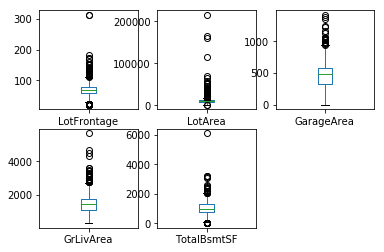

In [5]:
# Check for outliers using graph
numdata = data.loc[:,["LotFrontage","LotArea","GarageArea","GrLivArea","TotalBsmtSF"]]
numdata.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False)

The data summary indicates that there may be some outliers. Indeed, from the boxplots above we could see that some variables contain outliers. These outliers will be dealt under the "Data Consistency" section.

As we attempt to build linear regression model, we will see if SalePrice follows normal distribution. We will apply log on SalePrice as the variable is always nonnegative.

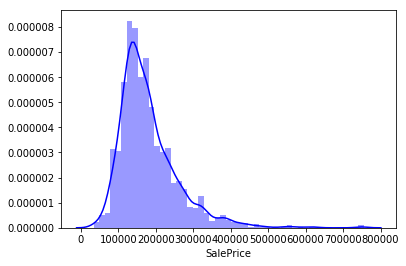

In [6]:
sb.distplot(data['SalePrice'],color="b")

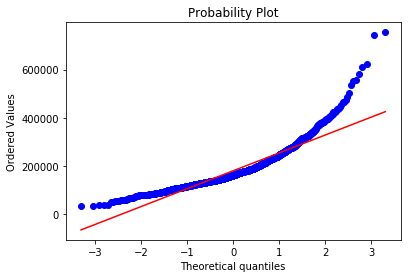

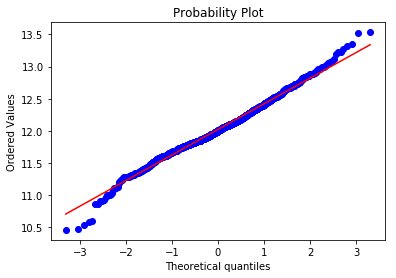

In [7]:
res = stats.probplot(data['SalePrice'], plot=pyplot)
pyplot.figure()
res = stats.probplot(np.log(data['SalePrice']), plot=pyplot)

After taking logarithm, it looks linear. We will use log(SalePrice) for modelling.

Text(0,0.5,'Sale Price')

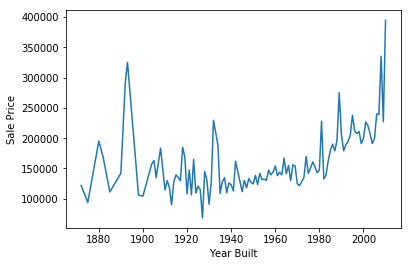

In [8]:
groupdata = pandas.DataFrame(data.groupby("YearBuilt").median())
pyplot.plot(groupdata["SalePrice"])
pyplot.xlabel("Year Built")
pyplot.ylabel("Sale Price")

The graph shows that SalePrice has unstable volatility, but increasing trend overall.

Now we will evaluate the categorical variables. By calculating the proportion of the top category for each, we could say that if the value is higher than 90%, the variable does not have a lot of variability and can be deleted. However, we will leave these variables for now and eliminate based on p-value in the "Feature Selection" step.

In [9]:
categoricals = data.select_dtypes(exclude=[np.number])
descat = categoricals.describe().T
descat["prop"]=descat["freq"]/descat["count"]
descat.sort_values(by=["prop"],ascending=False)

,count,unique,top,freq,prop
Utilities,1460,2,AllPub,1459,0.999315
Street,1460,2,Pave,1454,0.99589
Condition2,1460,8,Norm,1445,0.989726
RoofMatl,1460,8,CompShg,1434,0.982192
Heating,1460,6,GasA,1428,0.978082
GarageCond,1379,5,TA,1326,0.961566
GarageQual,1379,5,TA,1311,0.950689
LandSlope,1460,3,Gtl,1382,0.946575
CentralAir,1460,2,Y,1365,0.934932
Functional,1460,7,Typ,1360,0.931507


C:\Users\PC\Anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


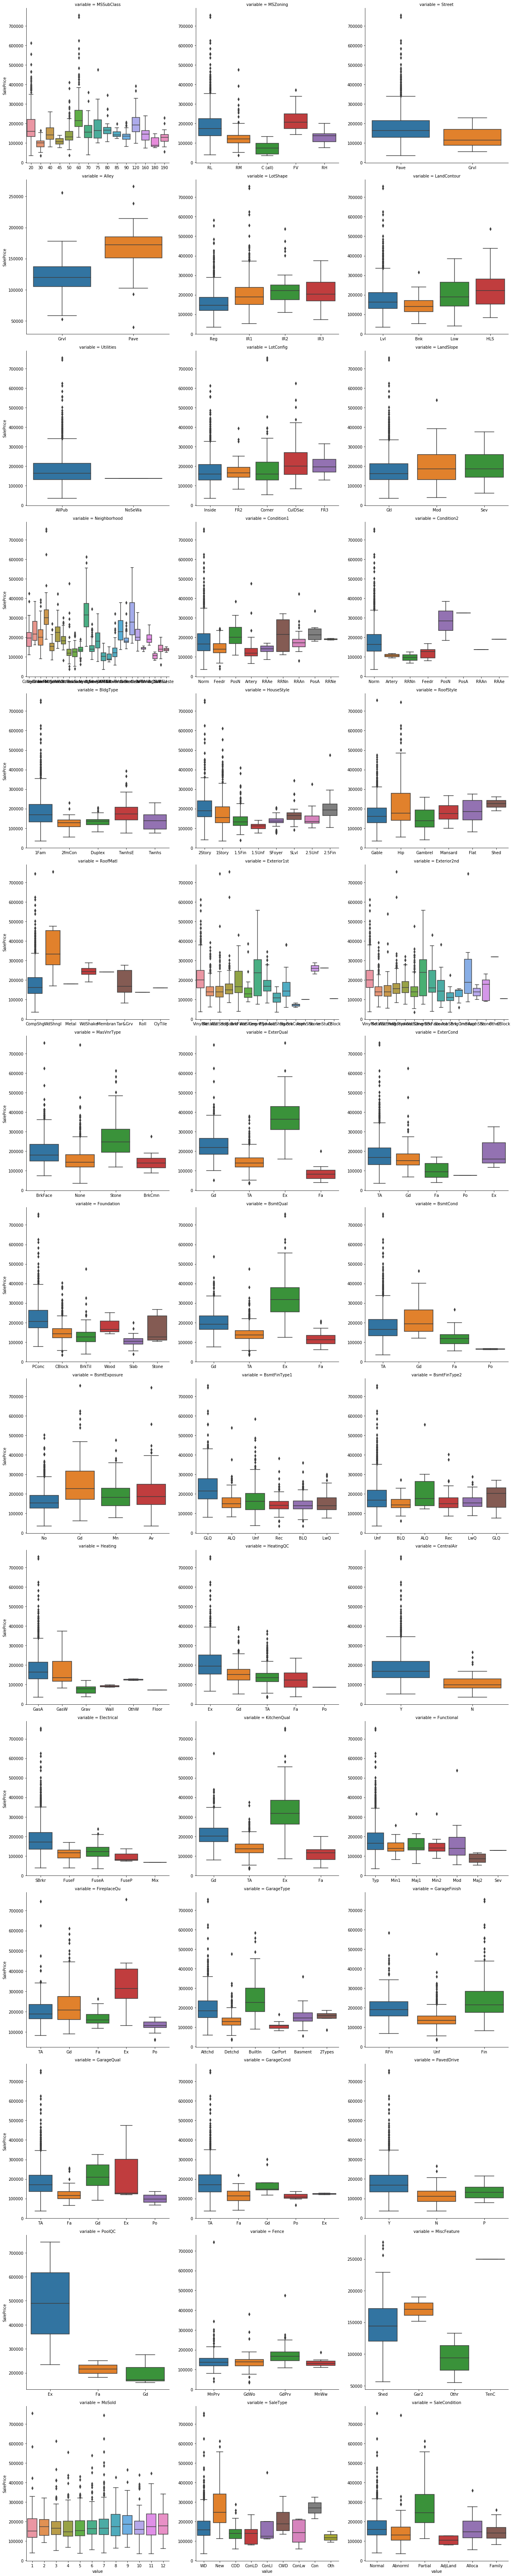

In [10]:
categoricals = data.select_dtypes(include=[pandas.Categorical])
cate_price = pandas.melt(data,id_vars=['SalePrice'],value_vars=categoricals)
def boxplot(x,y,**kwargs):
    sb.boxplot(x=x,y=y)

data_sbplot= sb.FacetGrid(cate_price,col='variable',col_wrap=3,sharex=False,sharey=False,size = 6)
g = data_sbplot.map(boxplot,"value","SalePrice")

The boxplots above could show whether a categorical variable has effect on SalePrice. For example, if the categories in a variable have significantly different SalePrice distribution, it may indicate that the variable is significant in the modelling. From the plots, variables such as "MSZoning" and "Housestyle" have effect on "SalePrice".

In [11]:
numvar = data.select_dtypes(include=[np.number])
corr = numvar.corr()
print(corr["SalePrice"].sort_values(ascending=False))

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
FirstFlrSF       0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
SecondFlrSF      0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
ThreeSsnPorch    0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


Based on the correlations above, we could see that some variables has strong linear relationship with SalePrice, such as OverallQual,GrLivArea, GarageArea, TotalBsmtSF.

Below, we will see the distributions of some variables.

Text(0.5,1,'OveralCond')

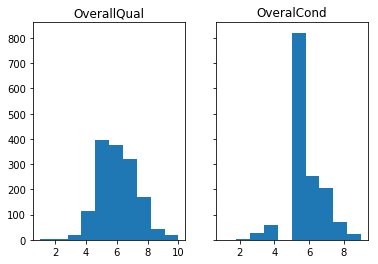

In [12]:
fig, ax = pyplot.subplots(1, 2, sharey=True)
ax[0].hist(data.OverallQual)
ax[0].set_title("OverallQual")
ax[1].hist(data.OverallCond)
ax[1].set_title("OveralCond")

Text(0,0.5,'SalePrice')

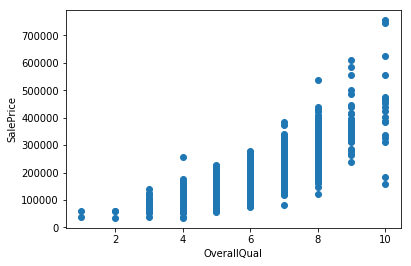

In [13]:
pyplot.scatter(x = "OverallQual", y = "SalePrice", data = data)
pyplot.xlabel("OverallQual")
pyplot.ylabel("SalePrice")

We can also plot the relationship between SalePrice and numerical variables, taking OverallQual as an example.

As OverallQual seems to have positive linear relationship with SalePrice, we will leave it as quantitative variable instead of categorical.

Text(0.5,1,'TotalBsmtSF-GrLivArea')

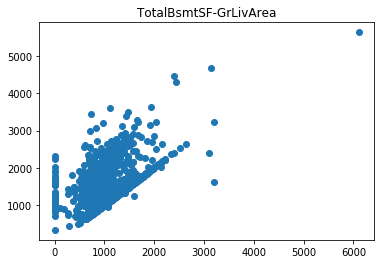

In [14]:
pyplot.scatter(data.TotalBsmtSF,data.GrLivArea)
pyplot.title("TotalBsmtSF-GrLivArea")

The graph above can be used to identify relationship between two variables. If we find that they have strong linear relationship, we could exclude one of them from the model as the information is represented in the other.

# Data Consistency

As stated previously, the data contains missing values and outliers and they will be dealt in this section.

## Missing values
### Categorical variables
* According to the data description file, most of the 'NaN' on the categorical variables may represent the lack of this particular feature on the house (e.g. no pool in a house) instead of values that were not recorded.
* Therefore, deleting these records will eliminate a specific demographic of the houses and this should be avoided.
* Hence, we treat the NaN values on the categorical variables as '0' to represent a new category.
### Continuous variables
* There are three continuous variables with 'NaN' values: LotFrontage, GarageYrBlt, and MasVnrArea

In [15]:
# Analyse missing values
def analyse_missing(df):
    missing_sum = df.isnull().sum()
    missing_sum = missing_sum.sort_values(ascending = False)
    print(missing_sum[missing_sum != 0])

analyse_missing(data)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageCond        81
GarageFinish      81
GarageQual        81
GarageYrBlt       81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


In [16]:
# Fill out missing values with 0 if the variable is categorical
             
missing_val_col = data.loc[:, data.isnull().any()].select_dtypes(include={'category'})

for col in missing_val_col:
    if(data[col].dtype.name == 'category'):
        data[col] = data[col].cat.add_categories([0])
        data[col].fillna(0, inplace = True)

print("Continuous variables with missing values:")
analyse_missing(data)

Continuous variables with missing values:
LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
dtype: int64


### LotFrontage

In [17]:
# For LotFrontage, we want to analyse the records where this variable is NaN to see if there's any reason
nan_lotfrontage = data[data["LotFrontage"].isnull()]
display(nan_lotfrontage.describe())
display(nan_lotfrontage.select_dtypes(include=[pandas.Categorical]).describe())

# Observe count ratios of LotShape for records where LotFrontage is missing and where LotFrontage exists
print("Ratio based on records with missing LotFrontage")
print(nan_lotfrontage["LotShape"].value_counts() / len(nan_lotfrontage))
print("Ratio based on records with existing LotFrontage")
print(data["LotShape"].value_counts() / len(data))

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,FirstFlrSF,SecondFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ThreeSsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
count,0.0,259.000000,259.000000,259.000000,259.000000,259.000000,257.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,252.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000
mean,NaN,13137.370656,5.992278,5.637066,1974.455598,1983.362934,108.249027,520.505792,63.119691,464.737452,1048.362934,1182.050193,351.254826,2.243243,1535.548263,0.494208,0.073359,1.555985,0.444015,2.880309,1.023166,6.436293,0.803089,1978.341270,1.779923,475.463320,117.223938,49.934363,18.351351,4.725869,15.212355,2.849421,126.949807,2007.876448,181620.073359
std,NaN,16215.264451,1.197518,1.194114,21.388093,17.826672,159.601115,406.520158,189.251415,393.549521,391.783686,388.274349,443.721337,32.960493,504.850450,0.516177,0.261230,0.549624,0.513153,0.842867,0.150722,1.606309,0.684710,18.809662,0.585535,175.996701,144.187284,67.106992,58.527176,31.736777,54.790911,45.857089,1102.676958,1.317806,57841.775706
min,NaN,1974.000000,1.000000,1.000000,1916.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,546.000000,0.000000,0.000000,720.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1916.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,61000.000000
25%,NaN,8065.500000,5.000000,5.000000,1962.000000,1969.000000,0.000000,140.500000,0.000000,182.000000,828.500000,901.000000,0.000000,0.000000,1106.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,5.000000,0.000000,1966.000000,2.000000,390.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,143375.000000
50%,NaN,10624.000000,6.000000,5.000000,1976.000000,1985.000000,0.000000,539.000000,0.000000,367.000000,1002.000000,1096.000000,0.000000,0.000000,1478.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1977.000000,2.000000,478.000000,64.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,172400.000000
75%,NaN,13018.500000,7.000000,6.000000,1993.500000,2000.000000,178.000000,769.500000,0.000000,675.000000,1270.500000,1415.000000,756.000000,0.000000,1857.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,1995.250000,2.000000,559.000000,191.000000,74.500000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,215000.000000
max,NaN,164660.000000,10.000000,9.000000,2009.000000,2010.000000,731.000000,1567.000000,1120.000000,1969.000000,3200.000000,3228.000000,1540.000000,528.000000,3447.000000,2.000000,1.000000,3.000000,2.000000,6.000000,2.000000,12.000000,3.000000,2009.000000,4.000000,1356.000000,670.000000,319.000000,318.000000,290.000000,396.000000,738.000000,15500.000000,2010.000000,466500.000000


,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,SaleType,SaleCondition
count,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259
unique,13,4,2,3,4,4,2,4,3,23,9,3,5,7,4,4,11,12,5,4,3,5,5,5,5,7,6,4,4,2,3,4,6,6,7,4,4,5,3,2,5,3,12,5,5
top,20,RL,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,Unf,TA,TA,Y,0,0,0,6,WD,Normal
freq,99,229,258,254,167,229,258,134,234,39,223,257,226,128,206,251,68,66,136,169,222,140,130,239,160,81,213,256,114,252,243,134,242,96,176,100,247,244,245,258,206,244,54,245,237


Ratio based on records with missing LotFrontage
IR1    0.644788
Reg    0.285714
IR2    0.057915
IR3    0.011583
Name: LotShape, dtype: float64
Ratio based on records with existing LotFrontage
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64


LotFrontage measures the area of street connected to property. Based on the analysis above, we observed that the records with missing LotFrontage has higher count of LotShape of type "IR1" than on the records with existing LotFrontage values (0.644 versus 0.331).

Nevertheless, the records with LotFrontage missing still have values related to Garage (e.g. GarageArea, GarageCars) , indicating that there may be street connected to the property. Thus, it could be assumed that the NaN values may be caused by measurement difficulties due to the irregular shape.

Therefore, imputation with zero will not be very efficient. Instead, we will find another variable that has the highest correlation with LotFrontage and perform stochastic regression imputation.

In [18]:
corr_list = []
for var in data.drop(["SalePrice", "LotFrontage"], axis = 1).select_dtypes(exclude={"category"}):
    corr = np.corrcoef(data[data.LotFrontage.notnull()]["LotFrontage"], data[data.LotFrontage.notnull()][var])
    if not np.isnan(corr[0,1]): corr_list.append((var, corr[0,1]))

corr_list.sort(key = lambda x: abs(x[1]), reverse = True)
display(corr_list)

[('FirstFlrSF', 0.45718100199465511),
 ('LotArea', 0.42609501877180816),
 ('GrLivArea', 0.40279741408531988),
 ('TotalBsmtSF', 0.39207457637917242),
 ('TotRmsAbvGrd', 0.35209594766022467),
 ('GarageArea', 0.3449967241064828),
 ('GarageCars', 0.28569092468510066),
 ('Fireplaces', 0.26663948256030318),
 ('BedroomAbvGr', 0.26316991588105854),
 ('OverallQual', 0.25164577548061273),
 ('BsmtFinSF1', 0.23363316701975534),
 ('PoolArea', 0.20616677527607646),
 ('FullBath', 0.19876867789737812),
 ('OpenPorchSF', 0.15197222768060678),
 ('BsmtUnfSF', 0.13264374162493389),
 ('YearBuilt', 0.12334946703331691),
 ('BsmtFullBath', 0.10094856694926888),
 ('YearRemodAdd', 0.088865572492068237),
 ('WoodDeckSF', 0.088520933289408132),
 ('SecondFlrSF', 0.080177270624204974),
 ('ThreeSsnPorch', 0.070029227730853905),
 ('OverallCond', -0.059213450005246845),
 ('HalfBath', 0.053531854979605997),
 ('BsmtFinSF2', 0.049899676690989617),
 ('ScreenPorch', 0.041382790675005936),
 ('LowQualFinSF', 0.03846853432895952

Text(0,0.5,'First Floor Surface')

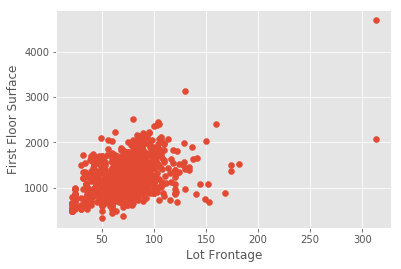

In [19]:
pyplot.style.use(style='ggplot')
pyplot.scatter(data["LotFrontage"], data["FirstFlrSF"])
pyplot.xlabel('Lot Frontage')
pyplot.ylabel('First Floor Surface')

In [20]:
# Ignore points where LotFrontage is bigger than 300 (based on analysis from plot above)
cleaned_lotfrontage_data = data[(data["LotFrontage"] < 300)]

lotfrontage_model = smf.ols(formula = "LotFrontage ~ FirstFlrSF", data = cleaned_lotfrontage_data).fit()

display(lotfrontage_model.summary())
print("MSE: ", lotfrontage_model.mse_total)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            LotFrontage   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     243.7
Date:                Sun, 14 Jan 2018   Prob (F-statistic):           3.82e-50
Time:                        20:11:35   Log-Likelihood:                -5305.7
No. Observations:                1199   AIC:                         1.062e+04
Df Residuals:                    1197   BIC:                         1.063e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.3195      1.906     21.676      0.000      37.580      45.059
FirstFlrSF     0.0245      0.002     15.610      0.000       0.021       0.028
==============================================================================
Omnibus:                      200.444   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              618.117
Skew:                           0.830   Prob(JB):                    5.99e-135
Kurtosis:                       6.101   Cond. No.                     3.96e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

MSE:  492.030587537


count    1460.000000
mean       70.206420
std        24.463397
min         7.954686
25%        58.000000
50%        69.931635
75%        81.303911
max       313.000000
Name: LotFrontage, dtype: float64


Text(0.5,1,'Imputed LotFrontage')

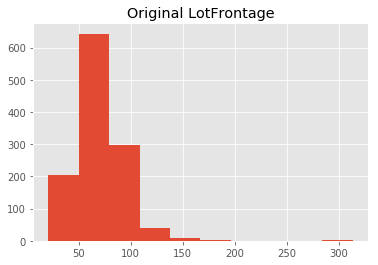

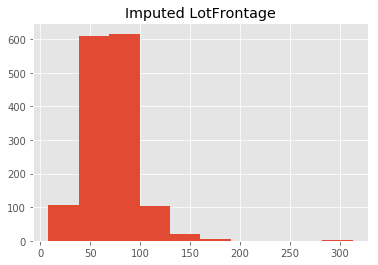

In [21]:
original_lotfrontage = data[data.LotFrontage.notnull()]["LotFrontage"].copy()

# Stochastic regression imputation for LotFrontage based on LotArea
def stochastic_regression_impute(x, coeff, const, error_var):
    y = const + (coeff * x) + (np.sqrt(error_var) * np.random.randn())
    return y

const_coef = lotfrontage_model.params[0]
firstflrf_coef = lotfrontage_model.params[1]
regression_var = lotfrontage_model.mse_total

data["LotFrontage"] = data.apply(lambda row: stochastic_regression_impute(row['FirstFlrSF'], firstflrf_coef, const_coef, regression_var) if np.isnan(row["LotFrontage"]) else row["LotFrontage"], axis=1)

print(data["LotFrontage"].describe())

pyplot.hist(original_lotfrontage)
pyplot.title("Original LotFrontage")
pyplot.figure()
pyplot.hist(data["LotFrontage"])
pyplot.title("Imputed LotFrontage")

The linear imputation allows us to fill out the missing values based on FirstFlrSF. As we can see from the resulting data, the distribution of LotFrontage is still similar to the original data albeit more centered. However, by doing this method of imputation, we will create artificial correlation between LotArea and FirstFlrSF.

### GarageYrBlt
We attempt to see if GarageYrBlt variable (which shows at which year the garage was built) can be removed by seeing if the values are nearly always similar with YearBuilt.

In [22]:
corr = np.corrcoef(data[data.GarageYrBlt.notnull()]["GarageYrBlt"], data[data.GarageYrBlt.notnull()]["YearBuilt"])
print("Correlation is: ", corr[0,1])

Correlation is:  0.825667484174


In [23]:
# See if GarageYrBlt is nearly always the same as YearBuilt
print(data.loc[:, ['GarageYrBlt', 'YearBuilt']])
diff_records = len(data[data.GarageYrBlt != data.YearBuilt])
existing_records = len(data[data.GarageYrBlt.notnull()])
print("Number of records where GarageYrBlt not equal to YearBuilt: ", diff_records)
print("Number of records where GarageYrBlt is not missing: ", existing_records)
print("Ratio of records where GarageYrBlt is equal to YearBuilt over number of existing records: ", (existing_records - diff_records) / existing_records)

      GarageYrBlt  YearBuilt
Id                          
1          2003.0       2003
2          1976.0       1976
3          2001.0       2001
4          1998.0       1915
5          2000.0       2000
6          1993.0       1993
7          2004.0       2004
8          1973.0       1973
9          1931.0       1931
10         1939.0       1939
11         1965.0       1965
12         2005.0       2005
13         1962.0       1962
14         2006.0       2006
15         1960.0       1960
16         1991.0       1929
17         1970.0       1970
18         1967.0       1967
19         2004.0       2004
20         1958.0       1958
21         2005.0       2005
22         1930.0       1930
23         2002.0       2002
24         1976.0       1976
25         1968.0       1968
26         2007.0       2007
27         2005.0       1951
28         2008.0       2007
29         1957.0       1957
30         1920.0       1927
31         1920.0       1920
32         1966.0       1966
33         200

1460       1965.0       1965
Number of records where GarageYrBlt not equal to YearBuilt:  371
Number of records where GarageYrBlt is not missing:  1379
Ratio of records where GarageYrBlt is equal to YearBuilt over number of existing records:  0.7309644670050761


GarageYrBlt is NaN when the property does not have any garage. If we impute it by 0, we will skew the distribution of this variable. On the other hand, imputing by other non-zero values would not make sense as the property does not have any garage. If we remove the records with GarageYrBlt NaN, we would be excluding all the properties which do not have garage.

From the analysis above, we could see that there is high correlation between GarageYrBlt and YearBuilt. Furthermore, for over 70% of the filled records, the GarageYrBlt is the same as the YearBuilt variable. Therefore, this column will be deleted.

In [24]:
data.drop("GarageYrBlt", inplace = True, axis = 1)

### MasVnrArea
Looking at the general values of MasVnrArea (Masonry veneer area), we could see that values where there is no masonry veneer (MasVnrType = "None") are recorded correctly as '0'. Thus 'NaN' values seem to be caused by non-recorded values. As we cannot find any strong correlation with other variables, we will remove these records.

In [25]:
# Impute MasVnrArea as 0
#data["MasVnrArea"].fillna(0, inplace = True)

nan_masvnrarea = data[data["MasVnrArea"].isnull()]
display(nan_masvnrarea)
display(nan_masvnrarea.describe())
display(nan_masvnrarea.select_dtypes(include=[pandas.Categorical]).describe())

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,FirstFlrSF,SecondFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ThreeSsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
235,60,RL,44.083368,7851,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,0,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,625,Unf,0,235,860,GasA,Ex,Y,SBrkr,860,1100,0,1960,1,0,2,1,4,1,Gd,8,Typ,2,TA,BuiltIn,Fin,2,440,TA,TA,Y,288,48,0,0,0,0,0,0,0,0,5,2010,WD,Normal,216500
530,20,RL,83.406388,32668,Pave,0,IR1,Lvl,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,3,1957,1975,Hip,CompShg,Wd Sdng,Stone,0,NaN,Gd,TA,PConc,TA,TA,No,Rec,1219,Unf,0,816,2035,GasA,TA,Y,SBrkr,2515,0,0,2515,1,0,3,0,4,2,TA,9,Maj1,2,TA,Attchd,RFn,2,484,TA,TA,Y,0,0,200,0,0,0,0,0,0,0,3,2007,WD,Alloca,200624
651,60,FV,65.000000,8125,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,6,2007,2007,Gable,CompShg,CemntBd,CmentBd,0,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,813,813,GasA,Ex,Y,SBrkr,822,843,0,1665,0,0,2,1,3,1,Gd,7,Typ,0,0,Attchd,RFn,2,562,TA,TA,Y,0,0,0,0,0,0,0,0,0,0,5,2008,WD,Normal,205950
937,20,RL,67.000000,10083,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,0,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833,Unf,0,343,1176,GasA,Ex,Y,SBrkr,1200,0,0,1200,1,0,2,0,2,1,Gd,5,Typ,0,0,Attchd,RFn,2,555,TA,TA,Y,0,41,0,0,0,0,0,0,0,0,8,2009,WD,Normal,184900
974,20,FV,95.000000,11639,Pave,0,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2007,2008,Gable,CompShg,CemntBd,CmentBd,0,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1428,1428,GasA,Ex,Y,SBrkr,1428,0,0,1428,0,0,2,0,3,1,Gd,6,Typ,0,0,Attchd,Fin,2,480,TA,TA,Y,0,120,0,0,0,0,0,0,0,0,12,2008,New,Partial,182000
978,120,FV,35.000000,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,0,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,1106,Unf,0,135,1241,GasA,Ex,Y,SBrkr,1241,0,0,1241,1,0,1,1,1,1,Gd,4,Typ,0,0,Attchd,Fin,2,569,TA,TA,Y,0,116,0,0,0,0,0,0,0,0,11,2007,New,Partial,199900
1244,20,RL,107.000000,13891,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,0,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386,Unf,0,690,2076,GasA,Ex,Y,SBrkr,2076,0,0,2076,1,0,2,1,2,1,Ex,7,Typ,1,Gd,Attchd,Fin,3,850,TA,TA,Y,216,229,0,0,0,0,0,0,0,0,9,2006,New,Partial,465000
1279,60,RL,75.000000,9473,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,0,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,804,Unf,0,324,1128,GasA,Ex,Y,SBrkr,1128,903,0,2031,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,RFn,2,577,TA,TA,Y,0,211,0,0,0,0,0,0,0,0,3,2008,WD,Normal,237000


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,FirstFlrSF,SecondFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ThreeSsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
count,8.000000,8.000000,8.00000,8.000000,8.000000,8.000000,0.0,8.000000,8.0,8.000000,8.000000,8.000000,8.000000,8.0,8.00000,8.00000,8.0,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,8.000000,8.000000,8.0000,8.000000,8.000000,8.0,8.0,8.0,8.0,8.000000,8.000000
mean,71.436219,12250.500000,7.25000,4.875000,1998.750000,2001.250000,NaN,746.625000,0.0,598.000000,1344.625000,1408.750000,355.750000,0.0,1764.50000,0.75000,0.0,2.000000,0.625000,2.750000,1.125000,6.62500,0.750000,2.125000,564.625000,63.0000,95.625000,25.000000,0.0,0.0,0.0,0.0,2007.875000,236484.250000
std,24.239582,8720.681035,1.28174,0.834523,17.002101,10.872639,NaN,521.198053,0.0,427.175441,481.376579,593.454957,496.213304,0.0,460.64706,0.46291,0.0,0.534522,0.517549,1.035098,0.353553,1.59799,0.886405,0.353553,125.870611,118.2298,89.162672,70.710678,0.0,0.0,0.0,0.0,1.246423,93964.474968
min,35.000000,4274.000000,6.00000,3.000000,1957.000000,1975.000000,NaN,0.000000,0.0,135.000000,813.000000,822.000000,0.000000,0.0,1200.00000,0.00000,0.0,1.000000,0.000000,1.000000,1.000000,4.00000,0.000000,2.000000,440.000000,0.0000,0.000000,0.000000,0.0,0.0,0.0,0.0,2006.000000,182000.000000
25%,59.770842,8056.500000,6.75000,5.000000,2002.000000,2002.000000,NaN,468.750000,0.0,301.750000,1061.000000,1061.000000,0.000000,0.0,1381.25000,0.75000,0.0,2.000000,0.000000,2.000000,1.000000,5.75000,0.000000,2.000000,483.000000,0.0000,30.750000,0.000000,0.0,0.0,0.0,0.0,2007.000000,196150.000000
50%,71.000000,9778.000000,7.00000,5.000000,2004.500000,2004.500000,NaN,818.500000,0.0,516.500000,1208.500000,1220.500000,0.000000,0.0,1812.50000,1.00000,0.0,2.000000,1.000000,3.000000,1.000000,7.00000,0.500000,2.000000,558.500000,0.0000,82.000000,0.000000,0.0,0.0,0.0,0.0,2008.000000,203287.000000
75%,86.304791,12202.000000,7.25000,5.000000,2006.250000,2007.000000,NaN,1134.250000,0.0,813.750000,1579.750000,1590.000000,858.000000,0.0,2042.25000,1.00000,0.0,2.000000,1.000000,3.250000,1.000000,7.25000,1.250000,2.000000,571.000000,54.0000,142.750000,0.000000,0.0,0.0,0.0,0.0,2008.250000,221625.000000
max,107.000000,32668.000000,10.00000,6.000000,2007.000000,2008.000000,NaN,1386.000000,0.0,1428.000000,2076.000000,2515.000000,1100.000000,0.0,2515.00000,1.00000,0.0,3.000000,1.000000,4.000000,2.000000,9.00000,2.000000,3.000000,850.000000,288.0000,229.000000,200.000000,0.0,0.0,0.0,0.0,2010.000000,465000.000000


,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,SaleType,SaleCondition
count,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
unique,3,2,1,2,2,1,1,3,1,6,1,1,2,2,2,1,3,3,1,2,1,1,3,2,2,3,1,1,2,1,1,3,2,3,2,2,1,1,1,1,1,1,6,2,3
top,20,RL,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,0,Attchd,RFn,TA,TA,Y,0,0,0,5,WD,Normal
freq,4,5,8,7,6,8,8,6,8,3,8,8,7,5,7,8,5,5,8,7,8,8,6,7,7,5,8,8,7,8,8,6,7,4,7,4,8,8,8,8,8,8,2,5,4


In [26]:
data.dropna(subset=["MasVnrArea"], inplace = True)
print(analyse_missing(data))

Series([], dtype: int64)
None


## Outliers

In [27]:
def boundary_calc(column):
    lower_quant = column.quantile(0.25)
    upper_quant = column.quantile(0.75)
    iqr = upper_quant - lower_quant
    lower_boundary = lower_quant - (1.5 * iqr)
    upper_boundary = upper_quant + (1.5 * iqr)
    return lower_boundary, upper_boundary

def outlier_checker(column):
    lower_boundary, upper_boundary = boundary_calc(column)
    outliers = column[(column < lower_boundary) | (column > upper_boundary)]
    print("{0} outliers for column {1} with values outside [ {2} , {3} ]".format(len(outliers), column.name, lower_boundary, upper_boundary))
    return outliers

# Check outliers for each continuous variable
for column in data:
    if(data[column].dtype.name != 'category'):
        outlier_checker(data[column])

88 outliers for column LotFrontage with values outside [ 23.42659294083846 , 115.62234509860257 ]
67 outliers for column LotArea with values outside [ 1446.875 , 17691.875 ]
2 outliers for column OverallQual with values outside [ 2.0 , 10.0 ]
124 outliers for column OverallCond with values outside [ 3.5 , 7.5 ]
7 outliers for column YearBuilt with values outside [ 1885.0 , 2069.0 ]
0 outliers for column YearRemodAdd with values outside [ 1909.0 , 2061.0 ]
96 outliers for column MasVnrArea with values outside [ -249.0 , 415.0 ]
8 outliers for column BsmtFinSF1 with values outside [ -1059.75 , 1766.25 ]
167 outliers for column BsmtFinSF2 with values outside [ 0.0 , 0.0 ]
28 outliers for column BsmtUnfSF with values outside [ -655.75 , 1686.25 ]
60 outliers for column TotalBsmtSF with values outside [ 41.0 , 2051.0 ]
19 outliers for column FirstFlrSF with values outside [ 118.5 , 2154.5 ]
2 outliers for column SecondFlrSF with values outside [ -1092.0 , 1820.0 ]
26 outliers for column Low

Based on the observations above, the dataset contains many outliers if measured by the quantile. However, we will analyse each variable to see if the outliers should be removed or preserved. The goal is to avoid deleting outliers that represents a group of demographic as it will significantly reduce the variability in our dataset.

We will preserve outliers for variables that won't have variability once the outliers are removed. This will be the variables: BsmtFinSF2, LowQualFinSF, BsmtHalfBath, EnclosedPorch, ThreeSsnPorch, ScreenPorch, PoolArea, MiscVal, and KitchenAbvGr.

Moreover, we also want to preserve the outliers on OverallQual and OverallCond to have data that represents the rating spectrum.

In [28]:
def outlier_remover(df, col_name):
    original_size = len(df)
    lower_boundary, upper_boundary = boundary_calc(df[col_name])
    new_df = df[(df[col_name] >= lower_boundary) & (df[col_name] <= upper_boundary)]
    print("Removed {0} outliers for column {1} with values outside [ {2} , {3} ]".format(original_size - len(new_df), col_name, lower_boundary, upper_boundary))
    return new_df
    
# Remove outliers for variables other than the ones excluded above
excluded_outliers = ["BsmtFinSF2", "LowQualFinSF", "BsmtHalfBath", "EnclosedPorch", "ThreeSsnPorch", 
                     "ScreenPorch", "PoolArea", "MiscVal","KitchenAbvGr", "OverallQual", "OverallCond"]
for column in data.drop(excluded_outliers, axis = 1):
    if(data[column].dtype.name != 'category'):
        data = outlier_remover(data, column)

Removed 88 outliers for column LotFrontage with values outside [ 23.42659294083846 , 115.62234509860257 ]
Removed 60 outliers for column LotArea with values outside [ 1941.125 , 16986.125 ]
Removed 2 outliers for column YearBuilt with values outside [ 1878.5 , 2074.5 ]
Removed 0 outliers for column YearRemodAdd with values outside [ 1909.0 , 2061.0 ]
Removed 83 outliers for column MasVnrArea with values outside [ -245.625 , 409.375 ]
Removed 1 outliers for column BsmtFinSF1 with values outside [ -1028.25 , 1713.75 ]
Removed 21 outliers for column BsmtUnfSF with values outside [ -627.625 , 1657.375 ]
Removed 47 outliers for column TotalBsmtSF with values outside [ 161.5 , 1845.5 ]
Removed 4 outliers for column FirstFlrSF with values outside [ 216.875 , 1945.875 ]
Removed 0 outliers for column SecondFlrSF with values outside [ -1092.0 , 1820.0 ]
Removed 24 outliers for column GrLivArea with values outside [ 224.5 , 2586.5 ]
Removed 1 outliers for column BsmtFullBath with values outside [

# Feature Selection
* First we attempt to do PCA on the dataset's numerical variables to see if they can be reduced to lower dimensions
* Afterwards, we will perform elimination based on the p-value of the variable for linear regression.

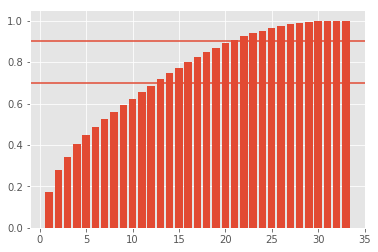

In [29]:
# Perform PCA on remaining dataset
import sklearn.decomposition
from sklearn.preprocessing import StandardScaler

pca_data = data.select_dtypes(exclude=[pandas.Categorical]).copy()
pca_data.drop("SalePrice", inplace = True, axis = 1)
scaled = StandardScaler().fit_transform(pca_data)
scaled_df = pandas.DataFrame(scaled, index=pca_data.index, columns=pca_data.columns)

house_pca = sklearn.decomposition.PCA()
data_proj = house_pca.fit_transform(scaled_df)
cum_var_ratio = np.cumsum(house_pca.explained_variance_ratio_)
pyplot.bar(x = range(1, house_pca.components_.shape[1] + 1),height = cum_var_ratio, label = "Cummulative variance ratio per number of dimensions")
pyplot.axhline(0.7)
pyplot.axhline(0.9)

We attempt to do PCA on the continuous variables in order to see if they can be explained in lower dimension. As shown above, to describe 70% of the variance in the data set, 13 dimensions will be required. On the other hand, to reach 90% of variability, 21 dimensions are needed.

Furthermore, applying PCA before the regression may not allow us to see directly the relationships between the independent variables and SalePrice. Hence, we will not use these results further.

Instead, we will run a generalized linear model with all the variables and inspect the ones where the p-value is lower than 0.05. This will be done iteratively until there is no remaining variables with p-value bigger than 0.05.

In [30]:
significant_vars = data.drop("SalePrice", axis = 1).columns
total_nonsignificant = len(significant_vars)

while (total_nonsignificant != 0):
    original_length = len(significant_vars)
    
    price_formula = "np.log(SalePrice) ~ " + " + ".join(significant_vars)
    price_model = smf.glm(formula = price_formula, data = data).fit()
    
    # As the glm method encode categorical variables, use regex to get the actual variable name
    significant_vars = price_model.pvalues[lambda pval: pval < 0.05].index
    significant_vars = list(map(lambda x: re.sub(r'\[(.)*]', "", x), significant_vars))
    if "Intercept" in significant_vars: significant_vars.remove("Intercept")
    significant_vars = set(significant_vars)
    print("Total variables with less than 0.05 p-value: ", len(significant_vars))
    print(significant_vars)
    
    total_nonsignificant = original_length - len(significant_vars)

Total variables with less than 0.05 p-value:  32
{'OverallQual', 'ScreenPorch', 'TotalBsmtSF', 'GarageCond', 'HeatingQC', 'Foundation', 'SaleCondition', 'GarageType', 'OverallCond', 'Condition1', 'LotArea', 'Electrical', 'MSZoning', 'Neighborhood', 'MSSubClass', 'GrLivArea', 'BsmtFinSF1', 'HouseStyle', 'BsmtCond', 'Functional', 'WoodDeckSF', 'KitchenQual', 'Exterior1st', 'LowQualFinSF', 'EnclosedPorch', 'BsmtFinType1', 'Condition2', 'YearBuilt', 'BldgType', 'YearRemodAdd', 'SecondFlrSF', 'MiscFeature'}
Total variables with less than 0.05 p-value:  30
{'OverallQual', 'ScreenPorch', 'TotalBsmtSF', 'GarageCond', 'HeatingQC', 'Foundation', 'SaleCondition', 'GarageType', 'OverallCond', 'Condition1', 'LotArea', 'MSZoning', 'Electrical', 'Neighborhood', 'MSSubClass', 'GrLivArea', 'BsmtFinSF1', 'HouseStyle', 'BsmtCond', 'Functional', 'WoodDeckSF', 'Exterior1st', 'KitchenQual', 'EnclosedPorch', 'BsmtFinType1', 'Condition2', 'YearBuilt', 'BldgType', 'YearRemodAdd', 'MiscFeature'}
Total variables

In [31]:
# Create dataframe that only has the significant variables
significant_df = data.loc[:, significant_vars].copy()
significant_df["SalePrice"] = data.SalePrice
display(significant_df.describe())
display(significant_df.select_dtypes(include={"category"}).describe())

,OverallQual,ScreenPorch,TotalBsmtSF,OverallCond,LotArea,GrLivArea,BsmtFinSF1,WoodDeckSF,EnclosedPorch,YearBuilt,YearRemodAdd,SalePrice
count,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000
mean,5.841121,14.181724,989.318795,5.649013,8849.777778,1360.468328,396.065421,75.985462,25.034268,1968.373832,1983.142264,157965.862928
std,1.132900,52.180472,284.265394,1.113780,2783.698699,368.593035,367.007062,99.795330,62.031193,29.911432,21.012062,45449.038478
min,1.000000,0.000000,190.000000,1.000000,1950.000000,438.000000,0.000000,0.000000,0.000000,1880.000000,1950.000000,37900.000000
25%,5.000000,0.000000,795.000000,5.000000,7200.000000,1073.000000,0.000000,0.000000,0.000000,1949.000000,1963.000000,127500.000000
50%,6.000000,0.000000,945.000000,5.000000,8910.000000,1346.000000,375.000000,0.000000,0.000000,1970.000000,1991.000000,151000.000000
75%,7.000000,0.000000,1159.000000,6.000000,10471.500000,1620.000000,660.000000,144.000000,0.000000,1998.000000,2003.000000,185000.000000
max,9.000000,396.000000,1845.000000,9.000000,16905.000000,2574.000000,1606.000000,394.000000,330.000000,2009.000000,2010.000000,281213.000000


,GarageCond,HeatingQC,Foundation,SaleCondition,GarageType,Condition1,Electrical,MSZoning,Neighborhood,MSSubClass,HouseStyle,BsmtCond,Functional,KitchenQual,Exterior1st,BsmtFinType1,Condition2,BldgType,MiscFeature
count,963,963,963,963,963,963,963,963,963,963,963,963,963,963,963,963,963,963,963
unique,6,5,5,6,7,9,6,5,25,15,8,4,6,4,14,6,4,5,4
top,TA,Ex,CBlock,Normal,Attchd,Norm,SBrkr,RL,NAmes,20,1Story,TA,Typ,TA,VinylSd,Unf,Norm,1Fam,0
freq,870,457,445,814,559,836,872,765,172,356,495,890,901,536,333,296,954,827,928


After obtaining the features with significant statistical relationship to SalePrice, we want to plot them to see the relationship.

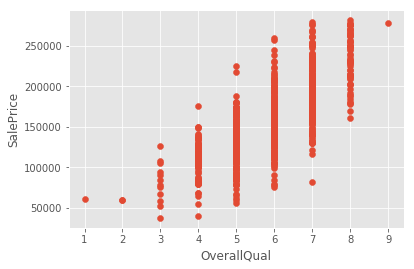

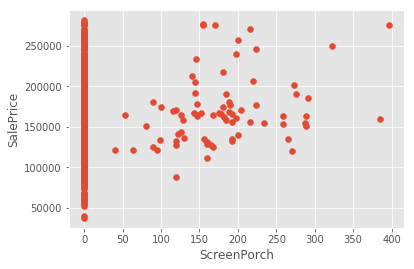

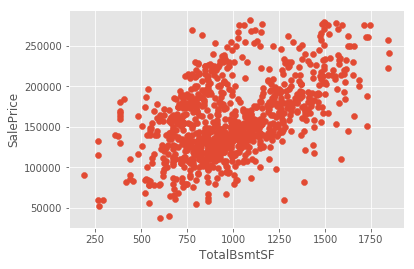

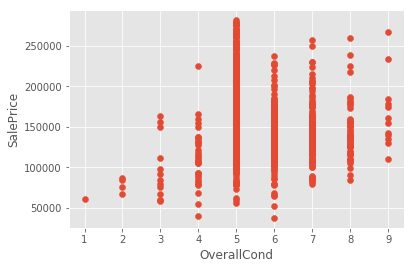

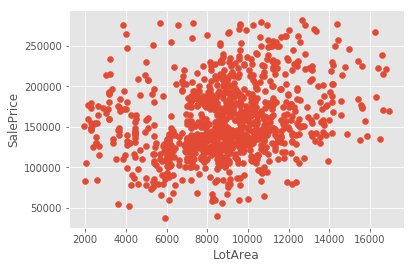

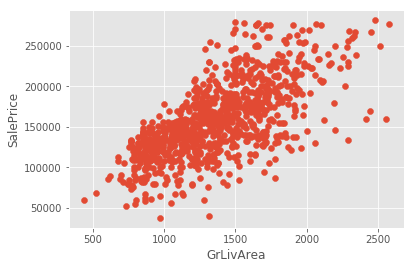

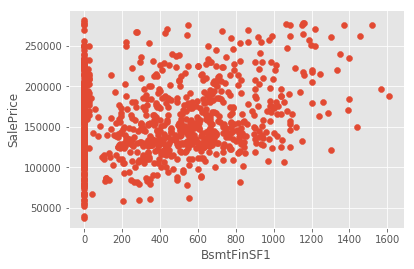

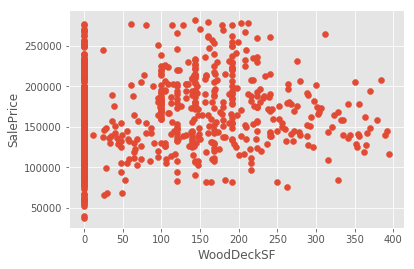

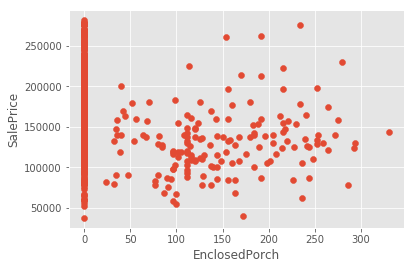

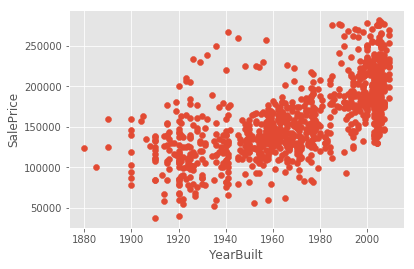

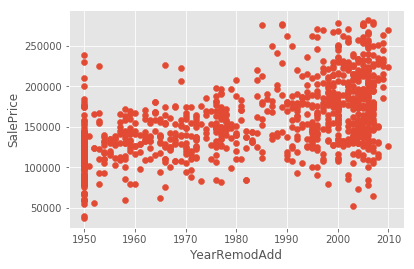

In [32]:
# Map the continous variables to see relationship with SalePrice
for var in significant_df.drop("SalePrice", axis = 1).select_dtypes(exclude={"category"}):
    pyplot.figure()
    pyplot.scatter(significant_df[var], significant_df["SalePrice"])
    pyplot.xlabel(var)
    pyplot.ylabel("SalePrice")


From the plot above, we could see that OverallCond does not seem to have linear relationship with the SalePrice. Hence, we will treat it as categorical variable from now on.

Furthermore, as our goal is to create a linear regression model with the variables, the plotting above indicates that LotArea and ScreenPorch do not show strong linear relationship with SalePrice. We will calculate the correlation for each variable with SalePrice below.

In [33]:
wrong_columns = ["OverallCond"]
for col in wrong_columns:
    significant_df[col] = significant_df[col].astype('category')

In [34]:
low_corr = []
for var in significant_df.drop("SalePrice", axis = 1).select_dtypes(exclude={"category"}):
    corr = np.corrcoef(significant_df[var], significant_df["SalePrice"])
    print(var, " : ", corr[0,1])
    if (abs(corr[0,1]) < 0.5): low_corr.append(var)

OverallQual  :  0.766487342673
ScreenPorch  :  0.107171931601
TotalBsmtSF  :  0.500433050539
LotArea  :  0.277165951309
GrLivArea  :  0.670705792169
BsmtFinSF1  :  0.221591410583
WoodDeckSF  :  0.227281014173
EnclosedPorch  :  -0.210804427153
YearBuilt  :  0.64395637096
YearRemodAdd  :  0.553264823897


We will remove the variables whose (absolute value) correlation with SalePrice is lower than 0.5.

In [35]:
significant_df.drop(low_corr, axis = 1, inplace = True)

In [36]:
display(significant_df.select_dtypes("category").describe())
display(significant_df.describe())

,GarageCond,HeatingQC,Foundation,SaleCondition,GarageType,OverallCond,Condition1,Electrical,MSZoning,Neighborhood,MSSubClass,HouseStyle,BsmtCond,Functional,KitchenQual,Exterior1st,BsmtFinType1,Condition2,BldgType,MiscFeature
count,963,963,963,963,963,963,963,963,963,963,963,963,963,963,963,963,963,963,963,963
unique,6,5,5,6,7,9,9,6,5,25,15,8,4,6,4,14,6,4,5,4
top,TA,Ex,CBlock,Normal,Attchd,5,Norm,SBrkr,RL,NAmes,20,1Story,TA,Typ,TA,VinylSd,Unf,Norm,1Fam,0
freq,870,457,445,814,559,506,836,872,765,172,356,495,890,901,536,333,296,954,827,928


,OverallQual,TotalBsmtSF,GrLivArea,YearBuilt,YearRemodAdd,SalePrice
count,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000
mean,5.841121,989.318795,1360.468328,1968.373832,1983.142264,157965.862928
std,1.132900,284.265394,368.593035,29.911432,21.012062,45449.038478
min,1.000000,190.000000,438.000000,1880.000000,1950.000000,37900.000000
25%,5.000000,795.000000,1073.000000,1949.000000,1963.000000,127500.000000
50%,6.000000,945.000000,1346.000000,1970.000000,1991.000000,151000.000000
75%,7.000000,1159.000000,1620.000000,1998.000000,2003.000000,185000.000000
max,9.000000,1845.000000,2574.000000,2009.000000,2010.000000,281213.000000


# Estimation / Prediction
We will predict the house price with several models to see which performs better.
* Linear regression with selected features
* Linear regression with all features for comparison
* Ridge regularisation with selected features
* Random forest

As scikit-learn does not automatically encode categorical variables, we use pandas' function to generate the dummy variables.

In [37]:
def dummify_dataframe(df):
    print("Total variables before dummies: ", len(df.columns))
    categorical_cols = df.select_dtypes('category').columns
    df = pandas.get_dummies(df, columns = categorical_cols)
    print("Total variables with dummies: ", len(df.columns))
    return df

significant_df = dummify_dataframe(significant_df)
display(significant_df[:5])


Total variables before dummies:  26
Total variables with dummies:  169


,OverallQual,TotalBsmtSF,GrLivArea,YearBuilt,YearRemodAdd,SalePrice,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_0,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_0,OverallCond_1,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_0,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_0,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_0,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_0
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,7,856,1710,2003,2003,208500,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,6,1262,1262,1976,1976,181500,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,7,920,1786,2001,2002,223500,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0

In [38]:
def actual_pred_plot(actual, pred):
    pyplot.figure()
    pyplot.scatter(actual, pred)
    pyplot.xlabel("Actual")
    pyplot.ylabel("Prediction")
    pyplot.plot(actual, actual, 'y')

def mse(actual, pred):
    mse = np.mean((actual - pred)**2)
    return mse

# Perform training and testing with given linear model and dataset
def saleprice_glm(lm, df, silent = False):
    X_train, X_test, y_train, y_test = train_test_split(df.drop("SalePrice", axis = 1), df.SalePrice, test_size=0.25, random_state=5)

    lm.fit(X_train, np.log(y_train))
    train_pred = lm.predict(X_train)
    train_mse = mse(y_train, np.exp(train_pred))

    
    test_pred = lm.predict(X_test)
    test_mse = mse(y_test, np.exp(test_pred))
    
    scores = model_selection.cross_val_score(lm, X_train, np.log(y_train), scoring='neg_mean_squared_error')
    
    if(not silent):
        print("Training MSE: ", train_mse)
        print("Test MSE: ", test_mse)
        actual_pred_plot(y_test, np.exp(test_pred))
        pyplot.title("Prediction on test data set")
        print("R squared value: ", lm.score(X_test, np.log(y_test)))
        print("Cross validation for negative mean squared error: ", scores)
    
    return test_mse, scores

Training MSE:  175124744.13446975
Test MSE:  257981687.09465772
R squared value:  0.845468279861
Cross validation for negative mean squared error:  [-0.01524932 -0.02315801 -0.02064742]


(257981687.09465772, array([-0.01524932, -0.02315801, -0.02064742]))

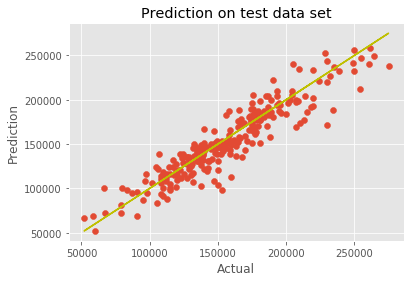

In [39]:
lm = LinearRegression()
saleprice_glm(lm, significant_df)


Total variables before dummies:  79
Total variables with dummies:  329
(963, 329)
Training MSE:  115805205.1518922
Test MSE:  412747060.69680524
R squared value:  0.722638636278
Cross validation for negative mean squared error:  [-0.02554054 -0.02877874 -0.03213417]


(412747060.69680524, array([-0.02554054, -0.02877874, -0.03213417]))

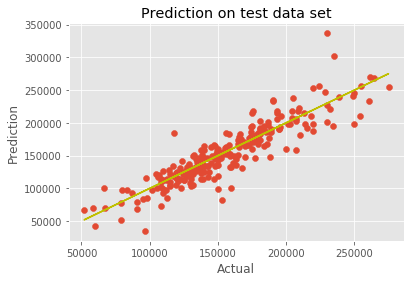

In [40]:
full_data = dummify_dataframe(data)
print(full_data.shape)
lm = LinearRegression()
saleprice_glm(lm, full_data)

Training MSE:  118653485.6915518
Test MSE:  278203651.71331877
R squared value:  0.83979350985
Cross validation for negative mean squared error:  [-0.01550251 -0.02325088 -0.02083536]


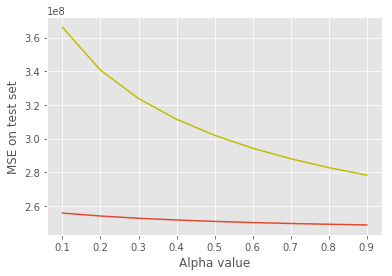

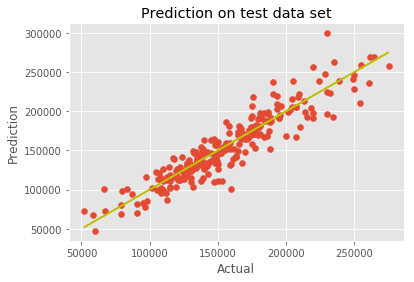

In [41]:
test_mse_list = []
for alpha_val in np.arange(0.1, 1, 0.1):
    ridge = linear_model.Ridge(alpha = alpha_val)
    test_mse, scores = saleprice_glm(ridge, full_data, silent = True)
    test_mse_list.append(test_mse)

pyplot.plot(np.arange(0.1, 1, 0.1), test_mse_list, 'y')

test_mse_list = []
for alpha_val in np.arange(0.1, 1, 0.1):
    ridge = linear_model.Ridge(alpha = alpha_val)
    test_mse, scores = saleprice_glm(ridge, significant_df, silent = True)
    test_mse_list.append(test_mse)

pyplot.plot(np.arange(0.1, 1, 0.1), test_mse_list)
pyplot.xlabel("Alpha value")
pyplot.ylabel("MSE on test set")

ridge = linear_model.Ridge(alpha = 0.9)
test_mse, scores = saleprice_glm(ridge, full_data)

On the alpha - MSE plot above, the yellow line represents regression done on the full data set, whereas the red line indicates the regression done on the selected features.

From this plot, we could see that higher value for alpha parameter in Ridge regression will produce the lowest MSE.

Training MSE:  366340554.4437522
Test MSE:  497106780.59801465
R squared value:  0.728036047148
Cross validation for negative mean squared error:  [-0.01539313 -0.02831474 -0.01870178]


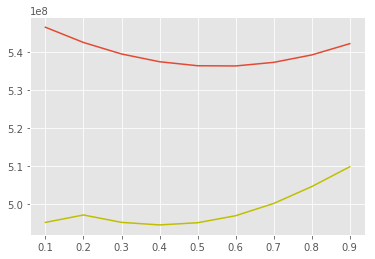

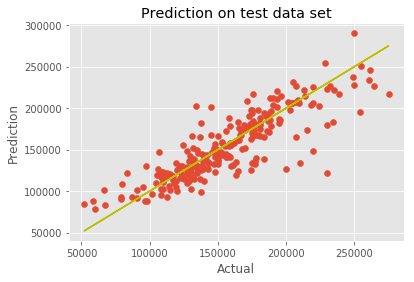

In [42]:
test_mse_list = []
for alpha_val in np.arange(0.1, 1, 0.1):
    lasso = linear_model.Lasso(alpha = alpha_val)
    test_mse, scores = saleprice_glm(lasso, full_data, silent = True)
    test_mse_list.append(test_mse)

pyplot.plot(np.arange(0.1, 1, 0.1), test_mse_list, 'y')

test_mse_list = []
for alpha_val in np.arange(0.1, 1, 0.1):
    lasso = linear_model.Lasso(alpha = alpha_val)
    test_mse, scores = saleprice_glm(lasso, significant_df, silent = True)
    test_mse_list.append(test_mse)

pyplot.plot(np.arange(0.1, 1, 0.1), test_mse_list)

lasso = linear_model.Lasso(alpha = 0.2)
test_mse, scores = saleprice_glm(lasso, full_data)

On the alpha - MSE plot above, the yellow line represents regression done on the full data set, whereas the red line indicates the regression done on the selected features.

For Lasso, alpha seems to minimize the test MSE at 0.2. However, this MSE value is still bigger than the other regression models performed previously.

## Random Forest

First we prepare the data by separating the predictors and the target (SalePrice). We also scaled the data.

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import RobustScaler

sc = RobustScaler()

full_x = full_data.drop("SalePrice", axis = 1)
scale_x = pandas.DataFrame(sc.fit_transform(full_x),index = full_x.index,columns = full_x.columns)

data_x, test_x, data_y, test_y = train_test_split(scale_x, full_data.SalePrice, test_size=0.25, random_state=5)

data_y = np.log(data_y)
test_y = np.log(test_y)


Then, we build the random forest tree below which will give us the importance rank for each feature as follow.

In [44]:
rf = RandomForestRegressor(n_estimators=200)
rf.fit(data_x, data_y)

imp = rf.feature_importances_
imprank = pandas.DataFrame({'feature': data_x.columns, 'score': imp})

Afterwards, we select the top 20 variables for visualization.

           feature     score
4        YearBuilt  0.238465
14       GrLivArea  0.115527
11      FirstFlrSF  0.037578
10     TotalBsmtSF  0.026462
17        FullBath  0.023387
24      GarageArea  0.023031
3      OverallCond  0.022529
1          LotArea  0.014978
5     YearRemodAdd  0.014426
34   MSSubClass_30  0.012759
23      GarageCars  0.012620
19    BedroomAbvGr  0.009648
237   CentralAir_Y  0.009351
7       BsmtFinSF1  0.008933
184   ExterQual_TA  0.008390
0      LotFrontage  0.007225
236   CentralAir_N  0.007129
9        BsmtUnfSF  0.007046
12     SecondFlrSF  0.006269
26     OpenPorchSF  0.004892


Text(0.5,1,'Top 20 important features by Random Forest')

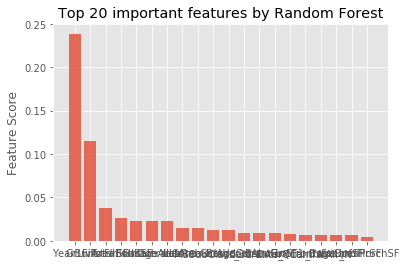

In [45]:
imprank = imprank.sort_values(by = 'score',axis = 0,ascending = False)
top20 = imprank[1:21]
print(top20)

objects = top20["feature"]
y_pos = np.arange(len(objects))
performance = top20["score"]
 
pyplot.bar(y_pos, performance, align='center', alpha=0.8)
pyplot.xticks(y_pos, objects)
pyplot.ylabel('Feature Score')
pyplot.title('Top 20 important features by Random Forest')

To evaluate the model, we perform cross validation based on negative mean squared error.

In [46]:
def rmse_cv(model,train_x,y):
    rmse = -model_selection.cross_val_score(model, train_x, y, 
                                    scoring="neg_mean_squared_error",
                                   cv = 5)
    return rmse

rf_mse = rmse_cv(rf,data_x,data_y)
print(rf_mse.mean(),rf_mse.std())

0.0176718974423 0.00969811928968


Test MSE:  342198259.5174014
Train MSE:  43195947.01704435


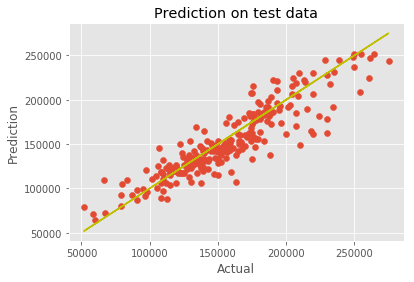

In [47]:
test_pred = rf.predict(test_x)
actual_pred_plot(np.exp(test_y),np.exp(test_pred))
pyplot.title("Prediction on test data")
print("Test MSE: ", mse(np.exp(test_y), np.exp(test_pred)))

train_pred = rf.predict(data_x)
print("Train MSE: ", mse(np.exp(data_y), np.exp(train_pred)))


# Conclusion

From the various models performed above, we could see that Random Forest has significantly lower mean squared error when predicting the training data set. However, it has comparable MSE result on the test data compared to the other models.

The standard linear regression model using the selected features seem to perform quite well on the test data set. On the other hand, running standard regression on the full data set resulted in higher test MSE. The best performing model using this criteria would be the regression with Ridge regularization using alpha as 0.9. 